In [1]:
import pandas as pd
import numpy as np
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import cv2

In [2]:
def load_image( infilename ) :
    img = Image.open( infilename ).convert('RGB')
    plt.imshow(img)
    return img

(1024, 768)


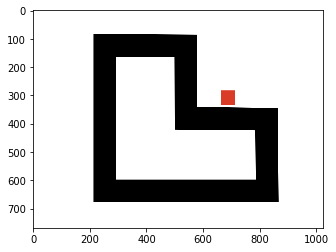

In [19]:
img = load_image('circuits/first_try03.png')
print(img.size)

In [4]:
def invert_img(img):
    img = ImageOps.invert(img)
    plt.imshow(img)
    return img

In [5]:
# img_invert = invert_img(img)

In [6]:
def rotate_img(img, angle):
    # Anti-clockwise rotation
    img_rot = img.rotate(angle, expand=True)
    plt.imshow(img_rot)
    return img_rot

In [7]:
# img_rot = rotate_img(img, 90)

In [8]:
def mirror_img(img, horizontal=False):
    if not horizontal:
        # if not horizontal : mirror from left to right
        img_mir = ImageOps.mirror(img)
    else:
        # if horizontal : mirror from top to bottom
        img = img.rotate(90, expand=True)
        img_mir = ImageOps.mirror(img)
        img_mir = img_mir.rotate(-90, expand=True)
        
    plt.imshow(img_mir)
    return img_mir

In [9]:
# img_mir = mirror_img(img_invert, True)

In [21]:
color_img = np.asarray(img)

In [11]:
def search_start(array):
    array = np.mean(array, axis=2)
    new_array = np.where(array < 125, array, 0)
    plt.imshow(new_array, cmap='gray')
    rows, cols = new_array.shape
    ind_r, ind_c = [], []
    
    for i in range(0,rows, 50):
        for j in range(0,cols,50):
            avg = np.mean(new_array[i:i+25,j:j+25])
            if avg <= 200 and avg >= 55:
                ind_r.append(i)
                ind_c.append(j)
#     print(ind_r, ind_c)
    
    tmp = new_array[ind_r[0]-45:ind_r[0]+45,ind_c[0]-45:ind_c[0]+45]
    
    return find_center(tmp)

In [12]:
def find_center(array):
    array = np.where(array < 125, array, 0)
    testr, testc = np.nonzero(array)
    square = []
    for k, l in zip(testr, testc):
        if array[k,l] == 105.0:
            square.append((k,l))
            
    dims = np.array(square[-1]) - np.array(square[0])
    center = np.array(square[0]) + dims/2
    return center

array([53., 34.])

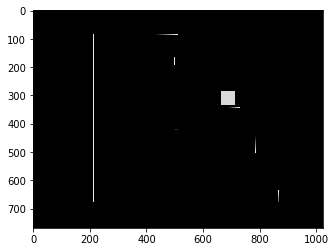

In [13]:
search_start(color_img)

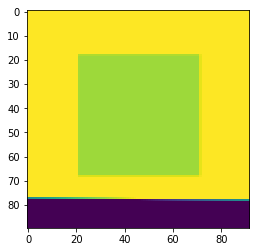

In [14]:
plt.imshow(color_img[265:355,643:735,0])
# plt.imshow(np.mean(color_img[265:355,643:735,:], axis=2), cmap='gray')

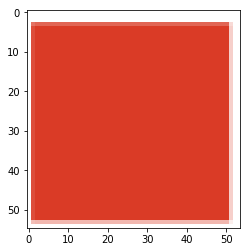

In [15]:
plt.imshow(color_img[280:335,663:717,:])

In [16]:
color_img[282:335,663:717,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 228, 225, ..., 248, 255, 255],
       [255, 221, 218, ..., 246, 255, 255],
       ...,
       [255, 221, 218, ..., 246, 255, 255],
       [255, 242, 241, ..., 251, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [17]:
np.mean(color_img[275:340,663:715,2])

93.50502958579882

In [23]:
image = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)
lower = np.array([155,25,0])
upper = np.array([179,255,255])
mask = cv2.inRange(image, lower, upper)
result = cv2.bitwise_and(result, result, mask=mask)

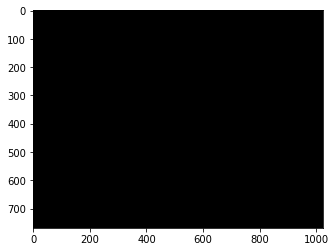

In [25]:
plt.imshow(result)

In [26]:
import numpy as np
import cv2

image = cv2.imread('circuits/first_try03.png')
result = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# lower = np.array([155,25,0])
# upper = np.array([179,255,255])
lower = np.array([0,50,50]) #example value
upper = np.array([10,255,255]) #example value
mask = cv2.inRange(image, lower, upper)
result = cv2.bitwise_and(result, result, mask=mask)

cv2.imshow('mask', mask)
cv2.imshow('result', result)
cv2.waitKey()

KeyboardInterrupt: 